In [1]:
!git clone https://github.com/pytorch-labs/float8_experimental.git

Cloning into 'float8_experimental'...


In [3]:
!pip install -e float8_experimental/

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Obtaining file:///C:/Users/st7ma/FP8/float8_experimental
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Checking if build backend supports build_editable: started
  Checking if build backend supports build_editable: finished with status 'done'
  Getting requirements to build editable: started
  Getting requirements to build editable: finished with status 'done'
  Preparing editable metadata (pyproject.toml): started
  Preparing editable metadata (pyproject.toml): finished with status 'done'
     -------------------------------------- 266.3/266.3 kB 2.0 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: 

In [6]:

import torch
import torch.nn as nn
from float8_experimental.float8_dynamic_linear import Float8DynamicLinear
from float8_experimental.float8_linear import Float8Linear
from float8_experimental.float8_linear_utils import (
    get_float8_linear,
    linear_requires_sync,
    LinearType,
    swap_linear_with_float8_linear,
    sync_float8_amax_and_scale_history,
)
from float8_experimental.float8_python_api import mm_float8
from float8_experimental.float8_tensor import Float8Tensor
from float8_experimental.float8_utils import (
    amax_to_scale,
    compute_error,
    E4M3_MAX_POS,
    E5M2_MAX_POS,
    FP16_MAX_POS,
    tensor_to_scale,
)
from tqdm import tqdm
UNIQUE5=torch.empty(size=(0,),dtype=torch.float32)
UNIQUE4=torch.empty(size=(0,),dtype=torch.float32)
with torch.no_grad():
    
    b=torch.rand(3000000)*2
    UNIQUE4=b.to(torch.float8_e4m3fn).to(torch.float32).unique()

    print("done1")
        
    b=torch.rand(3000000)*2

    UNIQUE5=b.to(torch.float8_e5m2).to(torch.float32).unique()
    print("done2")

arr5=UNIQUE5.numpy()
arr4=UNIQUE4.numpy()


done1
done2


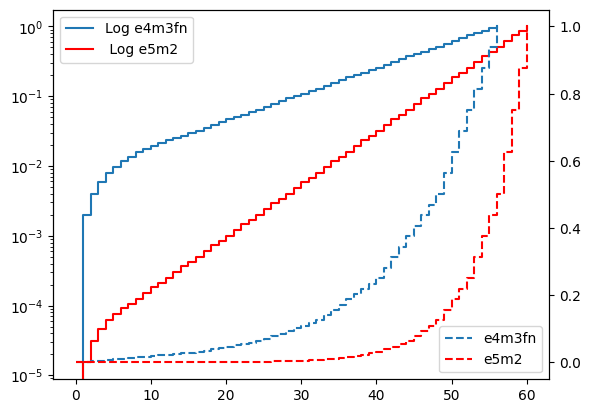

In [26]:
from matplotlib import pyplot as plt
import numpy as np
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.step(np.arange(len(arr4)), arr4, where='post', label='Log e4m3fn',)
#ax1.scatter(np.arange(len(arr4)), arr4,s=0.5, c='b', marker="s", label='e4m3fn')
ax1.step(np.arange(len(arr5)), arr5, where='post',c="r", label=' Log e5m2')
plt.legend(loc='upper left')
ax1.set_yscale("log")
#ax1.scatter(np.arange(len(arr5)),arr5, c='r',s=0.5, marker="o", label='e5m2')
ax2 = ax1.twinx()
ax2.step(np.arange(len(arr4)), arr4, where='post',  linestyle='--',label='e4m3fn')
#ax1.scatter(np.arange(len(arr4)), arr4,s=0.5, c='b', marker="s", label='e4m3fn')
ax2.step(np.arange(len(arr5)), arr5, where='post',c="r",  linestyle='--',label='e5m2')
ax2.set_yscale("linear")
plt.legend(loc='lower right')
plt.show()

In [4]:
import wandb
from tqdm import tqdm
from itertools import chain
wandb.login()
api = wandb.Api(timeout=45)
entity, project = "st7ma784", "8BitPrecisionTest"
runs = api.runs(entity + "/" + project)
data=[]
for run in runs:
    dic=run.history()
    array=dic['input to LSA']
    data.append(array)
    

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


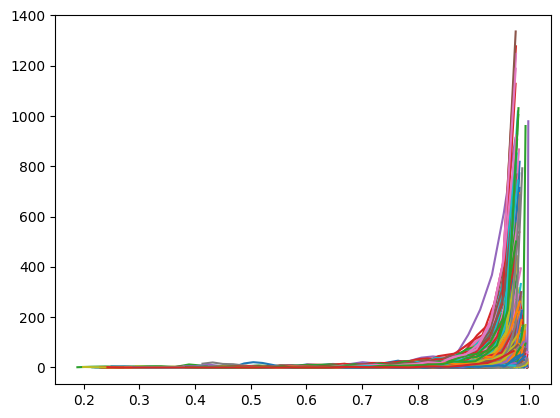

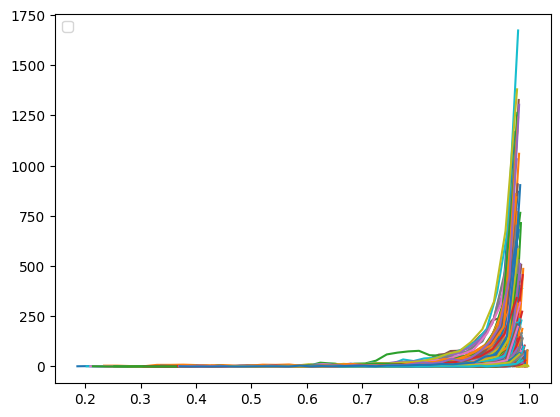

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
for d in data:
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    for entry in d:
        
        if entry is not None and not isinstance(entry,list) and not isinstance(entry,float):
            y=None
            if "bins" in entry:
                x=entry["bins"]
            elif "packedBins" in entry:
                deets=entry["packedBins"]
                dist=deets['size']*deets["count"]
                x=np.linspace(start=deets["min"],
                              stop=deets["min"]+dist,
                              num=deets["count"],
                              endpoint=False)
            y=entry["values"]

            ax1.plot(x[:len(y)],y)
#ax1.scatter(np.arange(len(arr4)), arr4,s=0.5, c='b', marker="s", label='e4m3fn')
plt.legend(loc='upper left')
    # figure=plt.figure(0)
    # table = wandb.Table(data=d, columns=["scores"])
    # wandb.log({'my_histogram': wandb.plot.histogram(table, "scores",
 	#   title="Prediction Score Distribution")})
